In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hearth-disease-recognition/sample_submission.csv
/kaggle/input/hearth-disease-recognition/train.csv
/kaggle/input/hearth-disease-recognition/test.csv


# Library

In [2]:
!pip install autogluon.tabular[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━

In [3]:
!pip install pandas matplotlib seaborn
!pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires p

In [4]:
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor
sns.set()
%config InlineBackend.figure_format = 'retina'

# Exploratory Data Analysis

In [6]:
train_data = pd.read_csv("/kaggle/input/hearth-disease-recognition/train.csv")
test_data = pd.read_csv("/kaggle/input/hearth-disease-recognition/test.csv")

In [7]:
train_data.isna()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
223080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
223081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
223082,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train_data.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74361 entries, 0 to 74360
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      74361 non-null  object 
 1   High Blood Pressure                     74361 non-null  object 
 2   Told High Cholesterol                   74361 non-null  object 
 3   Cholesterol Checked                     74361 non-null  object 
 4   Body Mass Index                         74361 non-null  float64
 5   Smoked 100+ Cigarettes                  74361 non-null  object 
 6   Diagnosed Stroke                        74361 non-null  object 
 7   Diagnosed Diabetes                      74361 non-null  object 
 8   Leisure Physical Activity               74361 non-null  object 
 9   Heavy Alcohol Consumption               74361 non-null  object 
 10  Health Care Coverage                    74361 non-null  ob

In [10]:
train_data['Income Level'].value_counts()

Income Level
$75,000 or more                  73702
$50,000 to less than $75,000     37029
$35,000 to less than $50,000     32394
$25,000 to less than $35,000     23647
$20,000 to less than $25,000     19089
$15,000 to less than $20,000     15669
($10,000 to less than $15,000    11078
Less than $10,000                10476
Name: count, dtype: int64

In [11]:
general_health = {'Excellent':2,'Good':1,'Fair':0,'Poor':-1,'Very Poor':-2}
income_level = {'$75,000 or more':8,'$50,000 to less than $75,000':7,'$35,000 to less than $50,000':6,'$25,000 to less than $35,000':5,'$20,000 to less than $25,000':4,'$15,000 to less than $20,000':3,'($10,000 to less than $15,000':2,'Less than $10,000':1}
yes_no = {'Yes':1,'No':0}
sex = {'Male':1,'Female':0}
yes_no_col_train = ['History of HeartDisease or Attack','High Blood Pressure','Told High Cholesterol','Cholesterol Checked','Smoked 100+ Cigarettes','Diagnosed Stroke','Diagnosed Diabetes',
             'Leisure Physical Activity','Heavy Alcohol Consumption','Doctor Visit Cost Barrier','Difficulty Walking','Vegetable or Fruit Intake (1+ per Day)','Health Care Coverage']
yes_no_col_test = ['High Blood Pressure','Told High Cholesterol','Cholesterol Checked','Smoked 100+ Cigarettes','Diagnosed Stroke','Diagnosed Diabetes',
             'Leisure Physical Activity','Heavy Alcohol Consumption','Doctor Visit Cost Barrier','Difficulty Walking','Vegetable or Fruit Intake (1+ per Day)','Health Care Coverage']
train_data[yes_no_col_train] = train_data[yes_no_col_train].replace(yes_no)
train_data['General Health'] = train_data['General Health'].replace(general_health)
train_data['Income Level'] = train_data['Income Level'].replace(income_level)
train_data['Sex'] = train_data['Sex'].replace(sex)
train_data.drop(['Education Level'], axis = 1,inplace = True)
train_data = train_data.dropna()
test_data[yes_no_col_test] = test_data[yes_no_col_test].replace(yes_no)
test_data['General Health'] = test_data['General Health'].replace(general_health)
test_data['Income Level'] = test_data['Income Level'].replace(income_level)
test_data['Sex'] = test_data['Sex'].replace(sex)
test_data.drop(['Education Level'], axis = 1,inplace = True)

/tmp/ipykernel_20/117459932.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[yes_no_col_train] = train_data[yes_no_col_train].replace(yes_no)
/tmp/ipykernel_20/117459932.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['General Health'] = train_data['General Health'].replace(general_health)
/tmp/ipykernel_20/117459932.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [12]:
train_data.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,0.0,1,1.0,1,40.68,1.0,0,0.0,0,0,1,0.0,-2.0,1.0,0,3,64,1
1,train_000002,0.0,0,0.0,0,24.36,1.0,0,0.0,1,0,0,1.0,0.0,0.0,0,1,50,0
2,train_000003,0.0,1,1.0,1,27.33,0.0,0,0.0,0,0,1,1.0,-2.0,1.0,0,8,61,1
3,train_000004,0.0,1,0.0,1,27.01,0.0,0,0.0,1,0,1,0.0,1.0,0.0,0,6,74,1
5,train_000006,0.0,1,1.0,1,25.11,1.0,0,0.0,1,0,1,0.0,1.0,0.0,1,8,67,1


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179319 entries, 0 to 223083
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      179319 non-null  object 
 1   History of HeartDisease or Attack       179319 non-null  float64
 2   High Blood Pressure                     179319 non-null  int64  
 3   Told High Cholesterol                   179319 non-null  float64
 4   Cholesterol Checked                     179319 non-null  int64  
 5   Body Mass Index                         179319 non-null  float64
 6   Smoked 100+ Cigarettes                  179319 non-null  float64
 7   Diagnosed Stroke                        179319 non-null  int64  
 8   Diagnosed Diabetes                      179319 non-null  float64
 9   Leisure Physical Activity               179319 non-null  int64  
 10  Heavy Alcohol Consumption               179319 no

<Axes: >

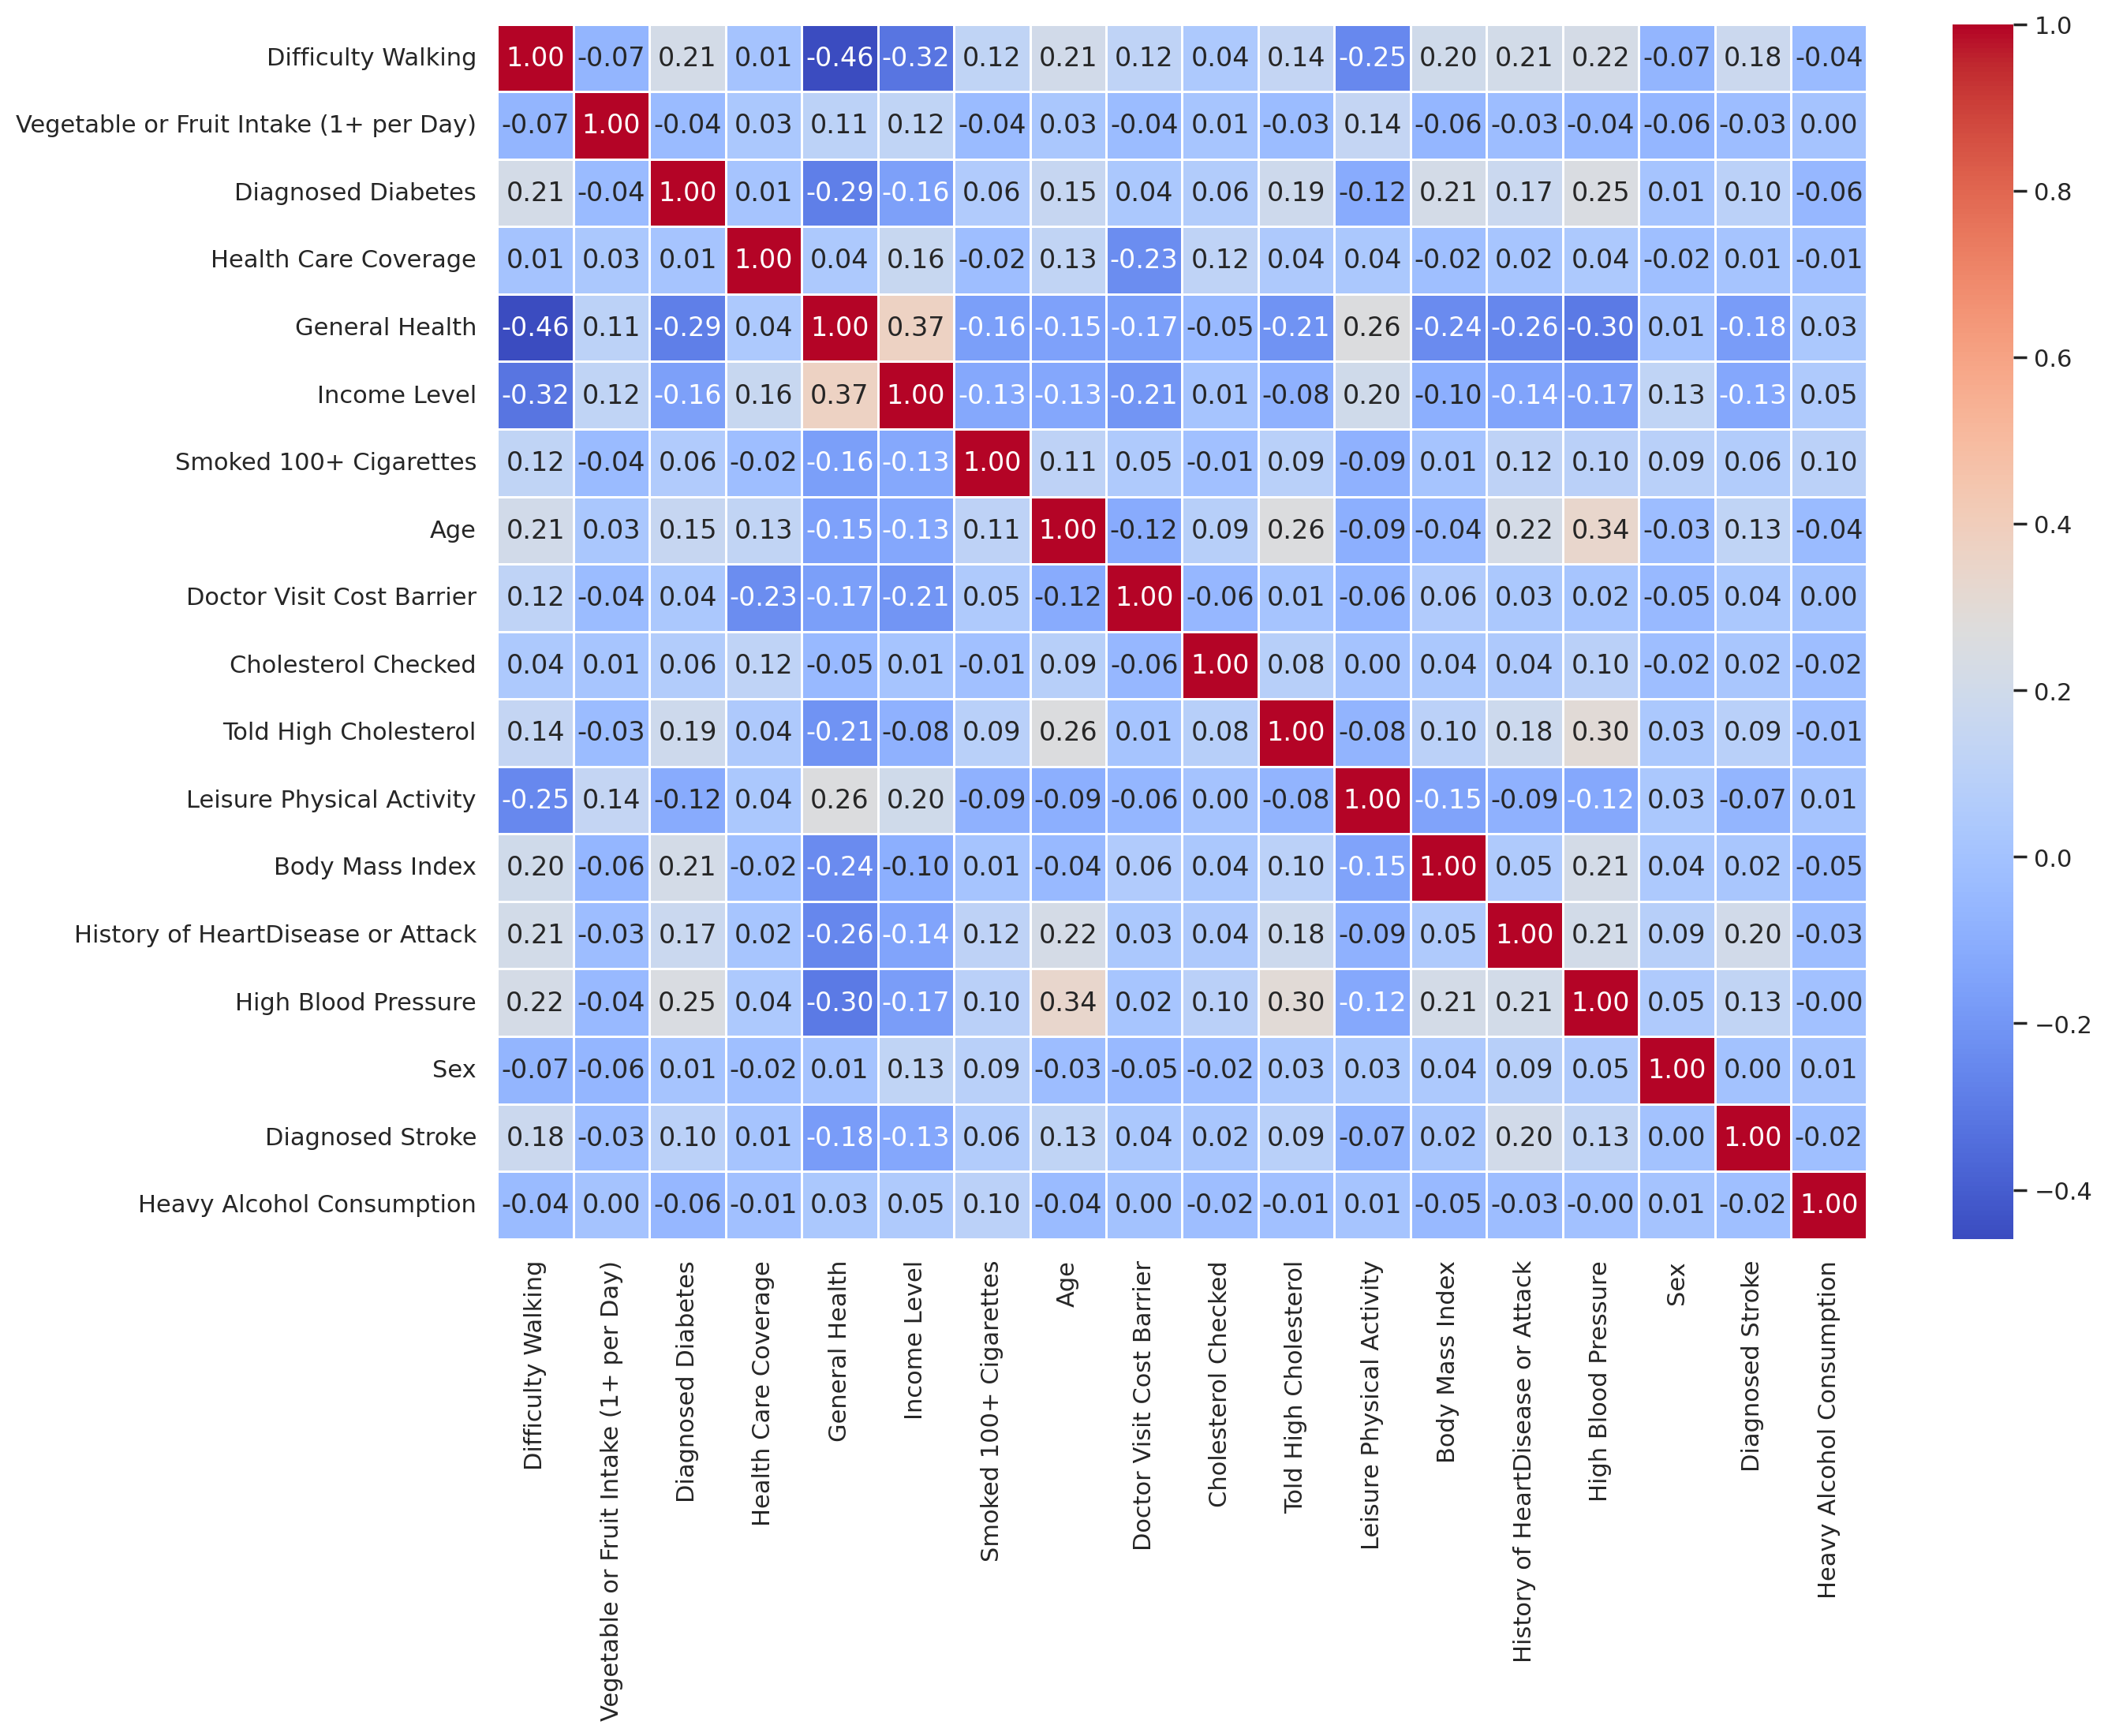

In [14]:
numerical = list(set(train_data)-{'ID'})
corr_matrix = train_data[numerical].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=.5)

# Preprocessing

In [15]:
train_data.drop(['Sex'], axis = 1,inplace = True)
train_data.drop(['Body Mass Index'], axis = 1,inplace = True)
train_data.drop(['Leisure Physical Activity'], axis = 1,inplace = True)
train_data.drop(['Smoked 100+ Cigarettes'], axis = 1,inplace = True)
train_data.drop(['Health Care Coverage'], axis = 1,inplace = True)
train_data.drop(['Cholesterol Checked'], axis = 1,inplace = True)
train_data.drop(['Vegetable or Fruit Intake (1+ per Day)'], axis = 1,inplace = True)
train_data.drop(['Doctor Visit Cost Barrier'], axis = 1,inplace = True)
train_data.drop(['ID'], axis = 1,inplace = True)

In [16]:
test_data.drop(['Sex'], axis = 1,inplace = True)
test_data.drop(['Body Mass Index'], axis = 1,inplace = True)
test_data.drop(['Leisure Physical Activity'], axis = 1,inplace = True)
test_data.drop(['Smoked 100+ Cigarettes'], axis = 1,inplace = True)
test_data.drop(['Health Care Coverage'], axis = 1,inplace = True)
test_data.drop(['Cholesterol Checked'], axis = 1,inplace = True)
test_data.drop(['Vegetable or Fruit Intake (1+ per Day)'], axis = 1,inplace = True)
test_data.drop(['Doctor Visit Cost Barrier'], axis = 1,inplace = True)
# test_data.drop(['ID'], axis = 1,inplace = True)

In [17]:
train_data.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Diagnosed Stroke,Diagnosed Diabetes,Heavy Alcohol Consumption,General Health,Difficulty Walking,Income Level,Age
0,0.0,1,1.0,0,0.0,0,-2.0,1.0,3,64
1,0.0,0,0.0,0,0.0,0,0.0,0.0,1,50
2,0.0,1,1.0,0,0.0,0,-2.0,1.0,8,61
3,0.0,1,0.0,0,0.0,0,1.0,0.0,6,74
5,0.0,1,1.0,0,0.0,0,1.0,0.0,8,67


In [18]:
df_yes = train_data[train_data['History of HeartDisease or Attack'] == 1.0].sample(n=16000, random_state=42)
df_no = train_data[train_data['History of HeartDisease or Attack'] == 0.0].sample(n=16000, random_state=42)
train_data = pd.concat([df_yes,df_no],ignore_index = True)

In [19]:
train_data['History of HeartDisease or Attack'].value_counts()

History of HeartDisease or Attack
1.0    16000
0.0    16000
Name: count, dtype: int64

# Modeling

In [20]:
save_path = 'best_model'
hyperparameters = {
    'GBM': [
        {'ag_args_fit': {'num_gpus': 0}},  # Train with CPU
        {'ag_args_fit': {'num_gpus': 1}}   # Train with GPU
    ],
    'CAT': [
        {'ag_args_fit': {'num_gpus': 0}},  # Train with CPU
        {'ag_args_fit': {'num_gpus': 1}}   # Train with GPU
    ],
    'XGB': [
        {'ag_args_fit': {'num_gpus': 0}},  # Train with CPU
        {'ag_args_fit': {'num_gpus': 1}}   # Train with GPU
    ],
    'RF': [
        {'ag_args_fit': {'num_gpus': 0}},  # Train with CPU
        {'ag_args_fit': {'num_gpus': 1}}   # Train with GPU
    ],

}
time_limit=600

In [21]:
predictor = TabularPredictor(label = 'History of HeartDisease or Attack',path = save_path,problem_type = 'binary', eval_metric = 'f1_macro').fit(train_data,presets="best",time_limit = time_limit,hyperparameters=hyperparameters)
print('finish')

Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Sep 27 10:16:09 UTC 2025
CPU Count:          4
Memory Avail:       29.93 GB / 31.35 GB (95.5%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validatio

(_ray_fit pid=1276) [1000]	valid_set's binary_logloss: 0.460352	valid_set's f1_macro: 0.78672
(_ray_fit pid=1276) [2000]	valid_set's binary_logloss: 0.457959	valid_set's f1_macro: 0.798328


(_dystack pid=263) 	0.7705	 = Validation score   (f1_macro)
(_dystack pid=263) 	28.45s	 = Training   runtime
(_dystack pid=263) 	1.24s	 = Validation runtime
(_dystack pid=263) Fitting model: LightGBM_2_BAG_L2 ... Training model for up to 7.32s of the 7.31s of remaining time.
(_dystack pid=263) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (1.0 workers, per: cpus=1, gpus=1, memory=0.05%)
(_ray_fit pid=1417) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1417) 	Ran out of time, early stopping on iteration 65. Best iteration is:
(_ray_fit pid=1417) 	[57]	valid_set's binary_logloss: 0.497983	valid_set's f1_macro: 0.767254
(_ray_fit pid=1458) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1458) 	Ran out of time, early stopping on iteration 63. Best iteration is:
(_ray_fit pid=1458) 	[22]	valid_set's binary_logloss: 

finish


In [22]:
y_pred = predictor.predict_proba(test_data)

# Submission

In [23]:
y_pred.head()

,0,1
0,0.554016,0.445984
1,0.650095,0.349905
2,0.436197,0.563803
3,0.776274,0.223726
4,0.821187,0.178813


In [24]:
y_pred['outcome'] = y_pred.apply(lambda row: 'Yes' if row[1] > 0.505 else 'No', axis=1)
y_pred.head()

,0,1,outcome
0,0.554016,0.445984,No
1,0.650095,0.349905,No
2,0.436197,0.563803,Yes
3,0.776274,0.223726,No
4,0.821187,0.178813,No


In [25]:
sample_submission = pd.read_csv("/kaggle/input/hearth-disease-recognition/sample_submission.csv")
sample_submission.head()

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,No
3,test_000004,NaN
4,test_000005,NaN


In [26]:
sample_submission['History of HeartDisease or Attack'] = y_pred['outcome']
print(sample_submission.tail())
print(sample_submission['History of HeartDisease or Attack'].value_counts())

                ID History of HeartDisease or Attack
74356  test_074357                                No
74357  test_074358                               Yes
74358  test_074359                               Yes
74359  test_074360                               Yes
74360  test_074361                               Yes
History of HeartDisease or Attack
No     48637
Yes    25724
Name: count, dtype: int64


In [27]:
sample_submission.to_csv("submission.csv", index=False)